# Zad3

### Punkt 4

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


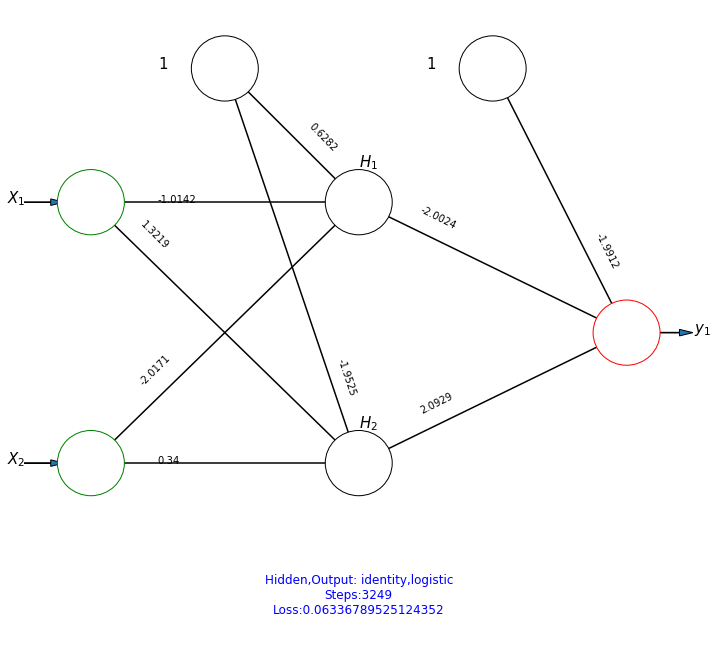

In [2]:
import sys
sys.path.append('..')
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
X = [[0,0],[0,1],[1,0],[1,1]] 
y = [0, 0, 0, 1] 
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=1, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 


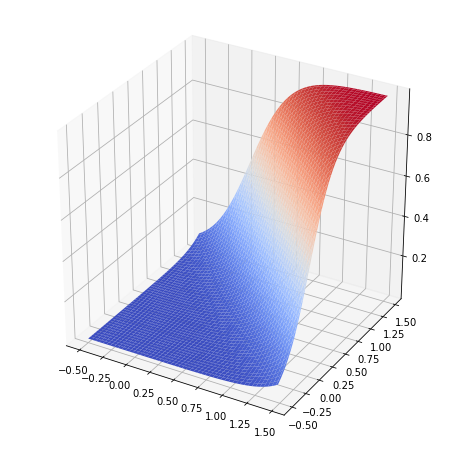

In [3]:
from NN_helpers import draw_response3D
draw_response3D(clf,X,y)

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	accuracy 0.25 	loss 1.221040441934744
iter 50 	accuracy 0.25 	loss 0.7920333659557331
iter 100 	accuracy 0.75 	loss 0.6235094407055499
iter 150 	accuracy 0.75 	loss 0.5666084910498125
iter 200 	accuracy 0.75 	loss 0.5412756330285596
iter 250 	accuracy 0.75 	loss 0.526401755174944
iter 300 	accuracy 0.75 	loss 0.5152209712433358
iter 350 	accuracy 0.75 	loss 0.5052374279715334
iter 400 	accuracy 0.75 	loss 0.4954490260493904
iter 450 	accuracy 0.75 	loss 0.4854357468742468
iter 500 	accuracy 0.75 	loss 0.4750237181413584
iter 550 	accuracy 0.75 	loss 0.4641518163695747
iter 600 	accuracy 0.75 	loss 0.45281579026446894
iter 650 	accuracy 0.75 	loss 0.4410435735975063
iter 700 	accuracy 0.75 	loss 0.4288834104949852
iter 750 	accuracy 0.75 	loss 0.416397206624116
iter 800 	accuracy 0.75 	loss 0.40365595023040923
iter 850 	accuracy 0.75 	loss 0.39073594971501685
iter 900 	accuracy 1.0 	loss 0.37771547098160174
iter 950 	accuracy 1.0 	loss 0.36467171764154677
iter 1000 	accuracy 1.0

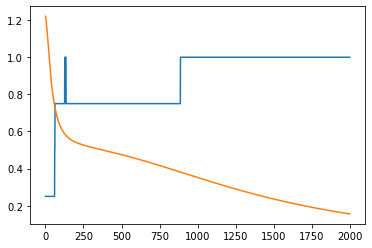

In [4]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=1, max_iter=1, warm_start=True)
licz=[] 
accu=[]
loss=[]
for i in range(2000):
    clf.fit(X, y)
    licz.append(i)
    accu.append(clf.score(X,y))
    loss.append(clf.loss_)
    if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
        print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
plt.plot(licz,accu,loss)

### Punkt 5

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	accuracy 0.25 	loss 1.3674714863008164
iter 50 	accuracy 0.75 	loss 0.7097291897008647
iter 100 	accuracy 0.75 	loss 0.676995391244605
iter 150 	accuracy 0.75 	loss 0.655095527943851
iter 200 	accuracy 0.75 	loss 0.6369802588893554
iter 250 	accuracy 0.75 	loss 0.6214292829575774
iter 300 	accuracy 0.75 	loss 0.6076056309760373
iter 350 	accuracy 0.75 	loss 0.5948682632269535
iter 400 	accuracy 0.75 	loss 0.5826718984518731
iter 450 	accuracy 0.75 	loss 0.5704995561924601
iter 500 	accuracy 0.75 	loss 0.5578091126625687
iter 550 	accuracy 0.75 	loss 0.5439846269143512
iter 600 	accuracy 0.75 	loss 0.5282898304057445
iter 650 	accuracy 0.75 	loss 0.5098302680275335
iter 700 	accuracy 0.75 	loss 0.48754788246355585
iter 750 	accuracy 0.75 	loss 0.4603024412067573
iter 800 	accuracy 0.75 	loss 0.4271291131636061
iter 850 	accuracy 0.75 	loss 0.3877397418128948
iter 900 	accuracy 1.0 	loss 0.34312532175124255
iter 950 	accuracy 1.0 	loss 0.29573656762875083
iter 1000 	accuracy 1.0 

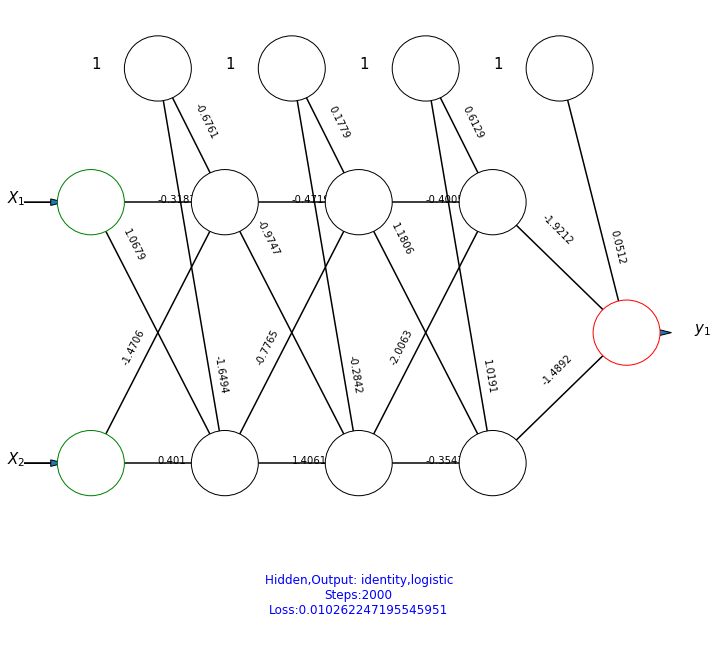

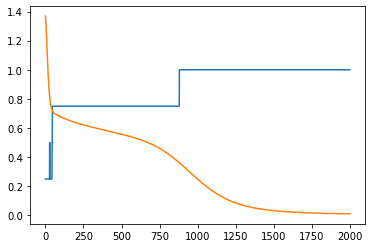

In [7]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2,2,2), activation='identity', random_state=1, max_iter=1, warm_start=True) 
licz=[] 
accu=[]
loss=[]
for i in range(2000):
    clf.fit(X, y)
    licz.append(i)
    accu.append(clf.score(X,y))
    loss.append(clf.loss_)
    if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
        print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_)
draw_nn(clf)
import matplotlib.pyplot as plt
plt.plot(licz,accu,loss)

### Punkt 6 i 7

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


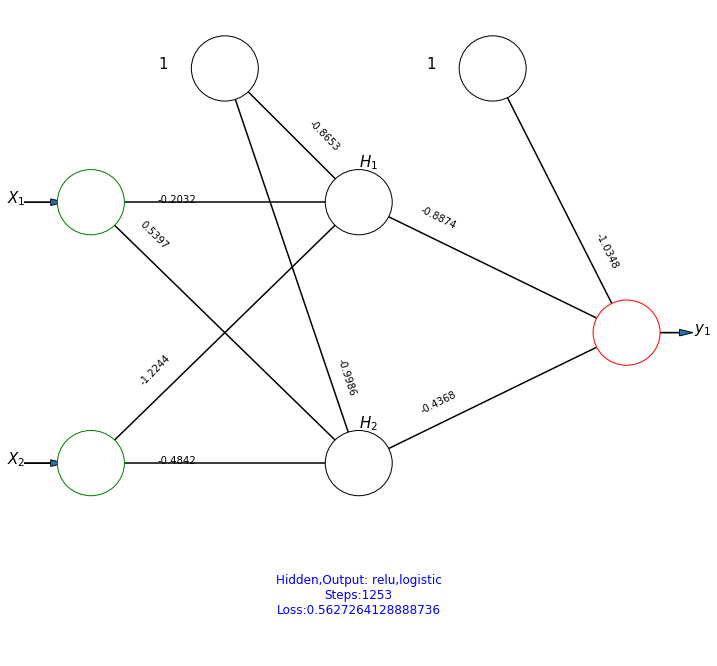

In [8]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), random_state=1, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 

### Punkt 10

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


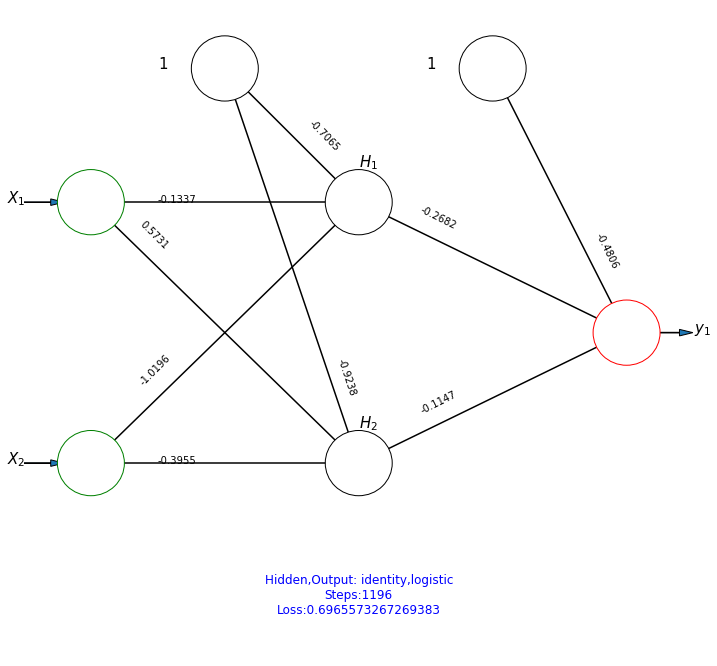

In [11]:
X = [[0,0],[0,1],[1,0],[1,1]] 
y = [0, 1, 1, 0] 
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=1, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 

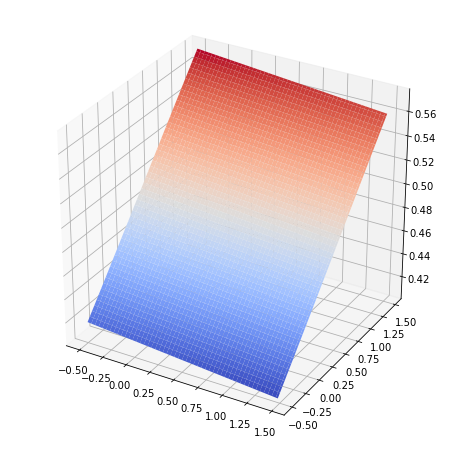

In [12]:
draw_response3D(clf,X,y)